In [35]:
#dataframes
import pandas as pd
import h5py

#speedup
import multiprocessing as mp

#suppress warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.TimeSeries = pd.Series 

#math
import numpy as np
from scipy.spatial.distance import cdist
from scipy import signal
import math
import copy


#plots
import pylab as plt
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
from figurefirst import FigureLayout,mpl_functions
import figurefirst
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import make_axes_locatable # for colorbar
import seaborn as sns
sns.set()
sns.set_style("whitegrid")
import figurefirst as fifi
from IPython.display import display,SVG

#misc
import cairosvg
import itertools
import time
np.set_printoptions(suppress=True)

FS=7

In [36]:
dir='~/DataAnalysis/data/DesertWind/'
df1 = pd.read_hdf(dir+"20201020_172919_windy_b_data.hdf")
# df2 = pd.read_hdf("../../../../Figure/methodfigure2/windgpsdata.hdf") #Forest
dir2 = '~/DataAnalysis/data/ForestWindData/'
df2 = pd.read_hdf(dir2 + "7.7.21_maskedgpsdata.hdf")

In [37]:
dt=df1.time_epoch.iloc[1]-df1.time_epoch.iloc[0]
arr_dat = [df1,df2]
for i in range(len(arr_dat)):
    dataframe = arr_dat[i]
    time = []
    time.append(0)
    for j in range(1,len(arr_dat[i])):
        time.append(time[j-1]+dt)

    arr_dat[i]['time'] = time     

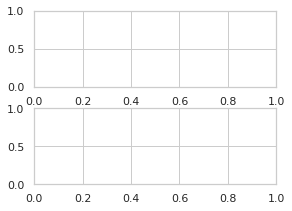

In [51]:
layout = fifi.svg_to_axes.FigureLayout('../../../../Figure/verticalMovement.svg',
                                           autogenlayers=True, make_mplfigures=True, hide_layers=[])

## W Movement Desert Data

In [52]:
ax=layout.axes[('fig','ax1')]
ax.grid(False)
line_width=0.5
marker_size=0.5

ax.plot(df1.time,df1.W,linewidth=line_width,markersize=marker_size*2,rasterized= True)
# ax.set_xlim(200,800)
# ax.set_ylim(-1.5,1.5)

ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left':4,'bottom':4},
                            smart_bounds=True,
                            yticks=[-1.5,1.5],
                            xticks=[0,80000],
                            linewidth=0.5)

ax.set_xticklabels(['0','6'])
ax.set_ylabel('Ambient Wind\n Speed, m/s')
ax.yaxis.set_label_coords(-0.04, 0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig'], 'fig', cleartarget=True)
layout.write_svg('../../../../Figure/verticalMovement.svg')

## W Movement Forest Data

In [53]:
ax=layout.axes[('fig','ax2')]
ax.grid(False)
line_width=0.5
marker_size=0.5

ax.plot(df2.time,df2.W_1,linewidth=line_width,markersize=marker_size*2,rasterized= True)
ax.set_rasterization_zorder(-20)

mpl_functions.adjust_spines(ax,['left','bottom'],
                            spine_locations={'left':4,'bottom':4},
                            smart_bounds=True,
                            yticks=[-1.5,1.5],
                            xticks=[0,50000],
                            linewidth=0.5)

ax.set_xticklabels(['0','4'])
ax.set_xlabel('Time, hr')
ax.xaxis.set_label_coords(0.5, -0.1)
ax.set_ylabel('Ambient Wind\n Speed, m/s')
ax.yaxis.set_label_coords(-0.04, 0.5)

figurefirst.mpl_functions.set_fontsize(ax, FS)
layout.append_figure_to_layer(layout.figures['fig'], 'fig', cleartarget=True)
layout.write_svg('../../../../Figure/verticalMovement.svg')